### Original Toy dataset

In [1]:
from datasets import load_dataset

dataset_name = "fusing/instructpix2pix-1000-samples"
dataset = load_dataset(dataset_name)
dataset = dataset["train"]

/home/user-name-goes-here/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
dataset[0]

{'input_image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512>,
 'edit_prompt': 'Turn it into a photo',
 'edited_image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512>}

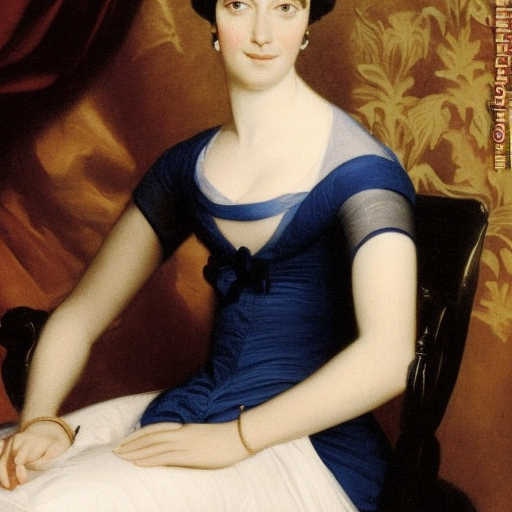

In [31]:
dataset[0]["input_image"]

In [11]:
dataset[0]["edit_prompt"]

'Turn it into a photo'

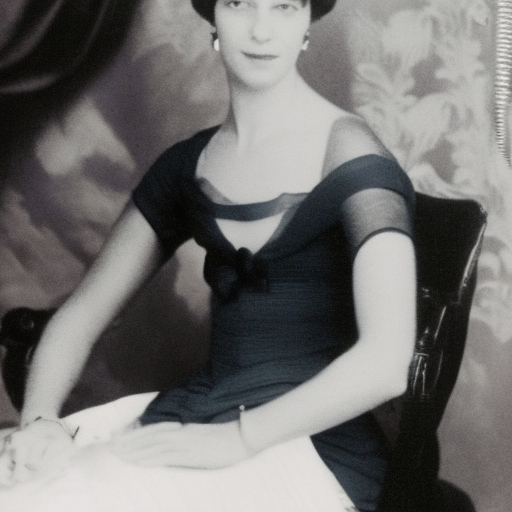

In [32]:
dataset[0]["edited_image"]

### Create Dataset from nfs

In [2]:
import os
from pathlib import Path
from PIL import Image

# original_images_path = "/code/comfyui_sandbox/video_renders/render_nfs_4screens_5_game_render"
styled_images_path = "/code/comfyui_sandbox/video_renders/render_nfs_4screens_6_sdxl_1"

# original_images = sorted(list(Path(original_images_path).glob("*.png")))
styled_images = sorted(list(Path(styled_images_path).glob("*.png")))

In [ ]:
original_images

In [ ]:
im = Image.open(styled_images[10])
im.show()

In [6]:
Image.open(styled_images[10]).show()

display-im6.q16: unable to open X server `' @ error/display.c/DisplayImageCommand/432.


In [34]:
len(styled_images)

852

In [36]:
print(Image.open(original_images[10]))

<PIL.PngImagePlugin.PngImageFile image mode=RGB size=1920x1080 at 0x7F4BA5783640>


#### compress images

In [ ]:
import os

# takes time
#
os.system(f"mkdir -p {original_images_path}/compressed")
os.system(f"mkdir -p {styled_images_path}/compressed")

os.system(f"cp {original_images_path}/*.png {original_images_path}/compressed")
os.system(f"cp {styled_images_path}/*.png {styled_images_path}/compressed")

os.system(f"pngquant {original_images_path}/compressed/*.png")
os.system(f"pngquant {styled_images_path}/compressed/*.png")

In [ ]:
original_images_c = sorted(
    list(
        Path(
            f"{original_images_path}/compressed",
        ).rglob("*.png")
    )
)
styled_images_c = sorted(
    list(
        Path(
            f"{styled_images_path}/compressed",
        ).rglob("*.png")
    )
)

In [5]:
import concurrent


def compress_png(path):
    compressed_folder = f"{path.parent}/compressed"
    os.system(f"mkdir -p {compressed_folder}")
    new_path = f"{compressed_folder}/{path.stem}{path.suffix}"
    if not os.path.isfile(str(new_path)):
        os.system(f"pngquant --force --quality 70-95 {path} -o {new_path}")


def compress_parallel(png_paths):
    max_workers = 16
    with concurrent.futures.ThreadPoolExecutor(max_workers=max_workers) as executor:
        executor.map(
            compress_png,
            png_paths,
        )
# 4 min 3 sec
compress_parallel(png_paths=original_images)
compress_parallel(png_paths=styled_images)

In [3]:
import os
from tqdm.notebook import tqdm

dataset_dict = []


prompt = "make nfs 2005 photorealistic"


# for orig, style in tqdm(list(zip(original_images, styled_images))):
for style in tqdm(styled_images):
    # compressed_folder = f"{orig.parent}/compressed"
    # new_orig = f"{compressed_folder}/{orig.stem}{orig.suffix}"
  

    # compressed_folder = f"{style.parent}/compressed"
    # new_style = f"{style.parent}/compressed/{style.stem}{style.suffix}"
    

    # new_orig = Image.open(new_orig)
    new_style = Image.open(style)
    dataset_dict.append(
        {
            "pos": style.stem,
            # "edit_prompt": prompt,
            "edited_image": new_style,
        }
    )
    # break

    # break

  0%|          | 0/49467 [00:00<?, ?it/s]

In [ ]:
dataset_dict[170]['edited_image']

In [ ]:
new_style

In [8]:
from datasets import Dataset


dataset = Dataset.from_list(dataset_dict)

In [12]:
dataset[0]

{'input_image': <PIL.PngImagePlugin.PngImageFile image mode=P size=1920x1080>,
 'edit_prompt': 'make nfs 2005 photorealistic',
 'edited_image': <PIL.PngImagePlugin.PngImageFile image mode=P size=1920x1080>}

In [9]:
len(dataset)

49467

In [ ]:
dataset.push_to_hub("dim/render_nfs_4screens_6_sdxl_1")

In [1]:
128 / 49492


0.0025862765699506992

In [2]:
50 / (128 / 49492)

19332.8125

In [5]:
import os
from tqdm.notebook import tqdm

cp_images = styled_images[17000*2:17000*3]
for img_path in tqdm(cp_images):
    # print(img_path)
    os.system(f"cp {img_path} comfyui_sandbox/video_renders/render_nfs_4screens_6_sdxl_1_part_3")
    # break
    

  0%|          | 0/15467 [00:00<?, ?it/s]

In [7]:
len(styled_images) / 17_000

2.909823529411765

In [ ]:
#  GZIP=-9 tar cf render_nfs_4screens_6_sdxl_1_part_2.tar.gz render_nfs_4screens_6_sdxl_1_part_2/